# ATHLETICS MEDAL PREDICTION


---

## **Predicting probability of an athlete winning a medal in the Olympics.**

Dataset used: 120 years of Olympic history: athletes and results

basic bio data on athletes and medal results from Athens 1896 to Rio 2016



### IMPORTING LIBRARIES AND DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
tf.random.set_seed(100)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/archive (2)/athlete_events.csv')
#events = data
noc_regions = pd.read_csv('/content/drive/MyDrive/archive (2)/noc_regions.csv')

In [ ]:
data2 = data[data.Sport != 'Art Competitions'] #exclude art competitions
data3 = data2[data2.Sport == 'Athletics'] #examines only Athletics sport

### EDA: Analysing the dataset for the athletics sport and DATA CLEANING

In [ ]:
data3.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN


In [ ]:
data3.describe()

,ID,Age,Height,Weight,Year
count,38624.000000,37507.000000,32907.000000,32601.000000,38624.000000
mean,66880.006214,25.161223,176.256268,69.249287,1975.040182
std,39283.054916,4.398260,9.314487,15.393693,32.220923
min,8.000000,12.000000,142.000000,35.000000,1896.000000
25%,32293.000000,22.000000,170.000000,59.000000,1956.000000
50%,67403.500000,25.000000,176.000000,67.000000,1984.000000
75%,100544.000000,28.000000,183.000000,76.000000,2000.000000
max,135563.000000,52.000000,208.000000,165.000000,2016.000000


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38624 entries, 26 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38624 non-null  int64  
 1   Name    38624 non-null  object 
 2   Sex     38624 non-null  object 
 3   Age     37507 non-null  float64
 4   Height  32907 non-null  float64
 5   Weight  32601 non-null  float64
 6   Team    38624 non-null  object 
 7   NOC     38624 non-null  object 
 8   Games   38624 non-null  object 
 9   Year    38624 non-null  int64  
 10  Season  38624 non-null  object 
 11  City    38624 non-null  object 
 12  Sport   38624 non-null  object 
 13  Event   38624 non-null  object 
 14  Medal   3969 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.7+ MB


In [ ]:
data3.isna().sum() # counting null values

ID            0
Name          0
Sex           0
Age        1117
Height     5717
Weight     6023
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     34655
dtype: int64

Visualising some parameters like height and weight

In [ ]:
data3.Weight.describe().loc[['min','max']]

min     35.0
max    165.0
Name: Weight, dtype: float64

In [ ]:
import seaborn as sb

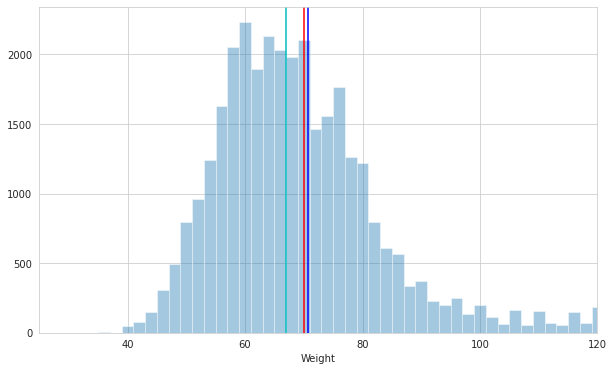

In [ ]:
plt.figure(figsize=(10,6))
bins = np.arange(25,214+2,2)
ax = sb.distplot(data3['Weight'], kde=False, bins=bins)
ax.set_xlim(25,120)
plt.axvline(x=70.7, c='b')
plt.axvline(x=data3.Weight.median(), c='c')
plt.axvline(x=data3.Weight.mode()[0], c='r');

In [ ]:
data3.Height.describe().loc[['min','max']]

min    142.0
max    208.0
Name: Height, dtype: float64

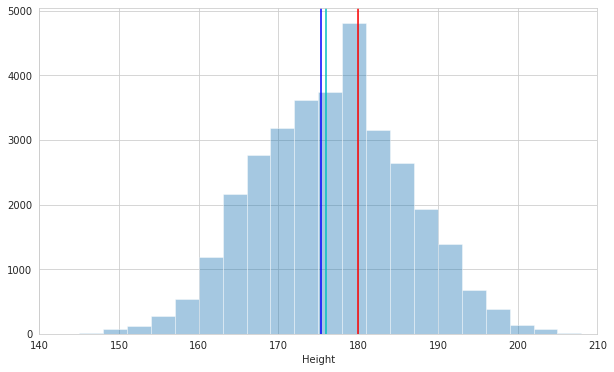

In [ ]:
plt.figure(figsize=(10,6))
bins = np.arange(127,226+3,3)
ax = sb.distplot(data3['Height'], kde=False, bins=bins)
ax.set_xlim(140,210)
plt.axvline(x=175.34, c = 'b')
plt.axvline(x=data3.Height.median(),c='c')
plt.axvline(x=data3.Height.mode()[0],c='r');

Let's see some top athletes and countries statistics

In [ ]:
top_medal_athletes = data3.groupby('Name').Medal.count().reset_index(name='Count') \
                                             .sort_values(by='Count', ascending=False).head(15)
top_medal_athletes

,Name,Count
15956,Paavo Johannes Nurmi,12
17024,"Raymond Clarence ""Ray"" Ewry",10
6367,"Frederick Carlton ""Carl"" Lewis",10
13709,Martin Joseph Sheridan,9
14091,Merlene Joyce Ottey-Page,9
955,Allyson Michelle Felix,9
20385,Veronica Angella Campbell-Brown,8
20142,Usain St. Leo Bolt,8
20508,"Viljo Eino ""Ville"" Ritola (Koukkari-)",8
8675,Irena Szewiska-Kirszenstein,7


In [ ]:
top_medal_teams = data3.groupby('Team').Medal.count().reset_index(name='Count') \
                                          .sort_values(by='Count', ascending=False).head(15)
top_medal_teams

,Team,Count
218,United States,1071
79,Great Britain,334
193,Soviet Union,242
100,Jamaica,156
77,Germany,154
62,East Germany,140
72,Finland,138
199,Sweden,128
73,France,110
168,Russia,103


Data Cleaning

In [ ]:
data3['Medal'] = data3['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [ ]:
data3 = data3.drop(['ID', 'Name', 'Games'], axis=1)

In [ ]:
data3 = data3.drop(['Sport'], axis=1) #there is only one sport- atheletics

In [ ]:
data3.isna().mean()

Sex       0.000000
Age       0.028920
Height    0.148017
Weight    0.155939
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [ ]:
data3.groupby(['Medal', 'Sex']).mean().astype(np.int)

Age  Height  Weight  Year
Medal Sex                           
0     F     24     169      59  1991
      M     25     179      73  1969
1     F     25     170      62  1985
      M     24     181      76  1957

In [ ]:
for column in ['Age', 'Height', 'Weight']:
    data3[column] = data3.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))

In [ ]:
data3.isna().sum()

Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Event     0
Medal     0
dtype: int64

In [ ]:
#non numeric values
{column: len(data3[column].unique()) for column in data3.select_dtypes('object').columns}

{'City': 23, 'Event': 83, 'NOC': 227, 'Season': 1, 'Sex': 2, 'Team': 231}

In [ ]:
#encoding

def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data3 = binary_encode(
    data3,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data3 = onehot_encode(
    data3,
    columns=['Team', 'NOC', 'City', 'Event'],
    prefixes=['T', 'N', 'C', 'E']
)

### SPLITTING AND TRAINING

In [ ]:
y = data3['Medal'].copy()
X = data3.drop('Medal', axis=1).copy()

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X.shape

(38624, 570)

In [ ]:
# MODEL

inputs = tf.keras.Input(shape=(X.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
676/676 [==============================] - 3s 3ms/step - loss: 0.2981 - accuracy: 0.8998 - auc: 0.7345 - val_loss: 0.2637 - val_accuracy: 0.9055 - val_auc: 0.8109
Epoch 2/100
676/676 [==============================] - 2s 3ms/step - loss: 0.2526 - accuracy: 0.9096 - auc: 0.8280 - val_loss: 0.2508 - val_accuracy: 0.9105 - val_auc: 0.8329
Epoch 3/100
676/676 [==============================] - 2s 3ms/step - loss: 0.2284 - accuracy: 0.9137 - auc: 0.8707 - val_loss: 0.2503 - val_accuracy: 0.9149 - val_auc: 0.8300
Epoch 4/100
676/676 [==============================] - 2s 3ms/step - loss: 0.2214 - accuracy: 0.9139 - auc: 0.8839 - val_loss: 0.2520 - val_accuracy: 0.9120 - val_auc: 0.8340
Epoch 5/100
676/676 [==============================] - 2s 3ms/step - loss: 0.1995 - accuracy: 0.9249 - auc: 0.9023 - val_loss: 0.2534 - val_accuracy: 0.9122 - val_auc: 0.8334
Epoch 6/100
676/676 [==============================] - 2s 3ms/step - loss: 0.1980 - accuracy: 0.9223 - auc: 0.9101 - val_loss

In [ ]:
model.evaluate(X_test, y_test)

363/363 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 0.9063 - auc: 0.8229


[0.2590571343898773, 0.906282365322113, 0.8228780627250671]

In [ ]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=np.int))

In [ ]:
print("Classification Report:\n", classification_report(y_true, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10385
           1       0.63      0.23      0.34      1203

    accuracy                           0.91     11588
   macro avg       0.78      0.61      0.64     11588
weighted avg       0.89      0.91      0.89     11588



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Confusion Matrix:
 [[10225   160]
 [  926   277]]
